In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
train=pd.read_csv('../input/advertsuccess/Train.csv')

In [3]:
test=pd.read_csv('../input/advertsuccess/Test.csv')

In [4]:
train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [5]:
train.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [6]:
test.shape

(6513, 11)

In [7]:
train.isnull().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [8]:
train.describe()

,id,average_runtime(minutes_per_week),ratings
count,26048.000000,26048.000000,26048.000000
mean,16268.744779,40.294111,0.038716
std,9413.578020,12.479457,0.075852
min,2.000000,1.000000,0.000000
25%,8095.750000,40.000000,0.027465
50%,16237.000000,40.000000,0.027465
75%,24413.500000,45.000000,0.027465
max,32561.000000,99.000000,1.000000


In [9]:
train['netgain'].value_counts()

False    19853
True      6195
Name: netgain, dtype: int64

In [10]:
count_F, count_T = train.netgain.value_counts()

# Divide by class
df_class_F = train[train['netgain'] == 0]
df_class_T = train[train['netgain'] == 1]

Random under-sampling:
True     6195
False    6195
Name: netgain, dtype: int64


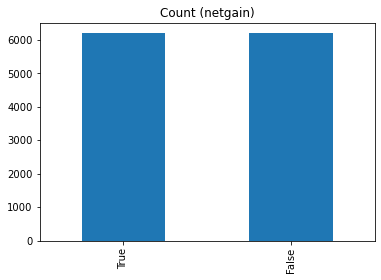

In [11]:
df_class_F_under = df_class_F.sample(count_T)
df_train = pd.concat([df_class_F_under, df_class_T], axis=0)

print('Random under-sampling:')
print(df_train.netgain.value_counts())

df_train.netgain.value_counts().plot(kind='bar', title='Count (netgain)');

Random under-sampling:
True     19853
False    19853
Name: netgain, dtype: int64


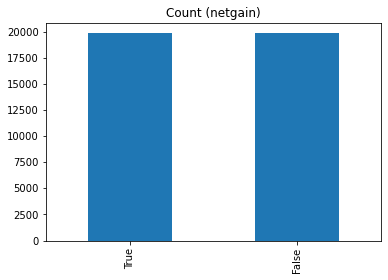

In [12]:
df_class_T_over = df_class_T.sample(count_F,replace=True)
df_train1 = pd.concat([df_class_F, df_class_T_over], axis=0)

print('Random under-sampling:')
print(df_train1.netgain.value_counts())

df_train1.netgain.value_counts().plot(kind='bar', title='Count (netgain)');

In [13]:
df_train1.shape

(39706, 12)

# correlation

In [14]:
df_train['netgain'].value_counts()


True     6195
False    6195
Name: netgain, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE 

#SMOTE have to be applied for training set only

#preprocessor = Pipeline(steps=[('encoder',encoding),('Std',StandardScaler())])

#X_train = preprocessor.fit_transform(X_train)
#X_test = preprocessor.transform(X_test)

#print("Shape of train dataset before applying SMOTE:",X_train.shape)

#X_train, y_train = SMOTE().fit_resample(X_train,y_train)

#print("Shape of train dataset after applying SMOTE:",X_train.shape)

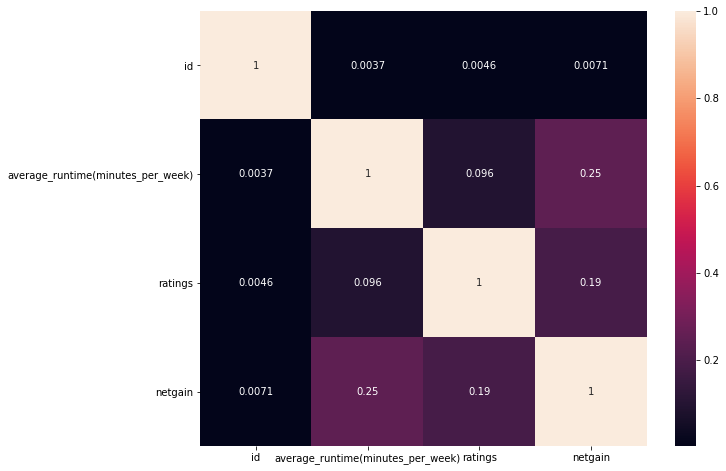

In [16]:
df_corr=df_train.corr()
f=plt.subplots(figsize=(10,8))
sns.heatmap(df_corr,annot=True)

In [17]:
df_corr

,id,average_runtime(minutes_per_week),ratings,netgain
id,1.000000,0.003679,0.004553,0.007078
average_runtime(minutes_per_week),0.003679,1.000000,0.095591,0.248090
ratings,0.004553,0.095591,1.000000,0.188364
netgain,0.007078,0.248090,0.188364,1.000000


In [18]:
df_train1['ratings']

0        0.027465
1        0.027465
2        0.027465
3        0.027465
5        0.027465
           ...   
3638     0.027465
3362     1.000000
22495    0.181428
2050     0.027465
7399     0.047937
Name: ratings, Length: 39706, dtype: float64

In [19]:
train['ratings'].skew()

11.370725992937627

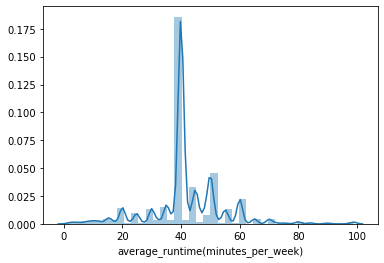

In [20]:
sns.distplot(df_train['average_runtime(minutes_per_week)'],bins=40)

# DATA VISULIZATION

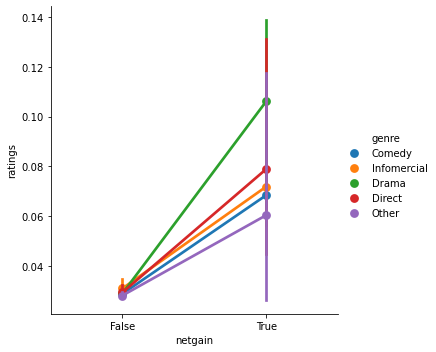

In [21]:
sns.catplot(data=df_train,x='netgain',y='ratings',hue='genre',kind='point')

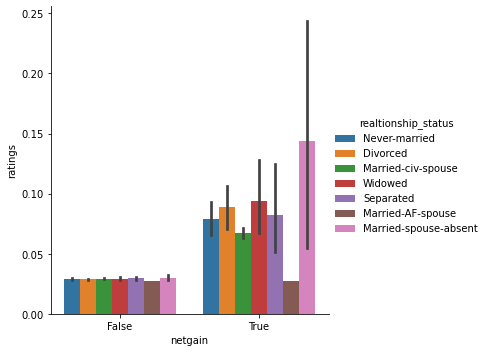

In [22]:
sns.catplot(data=df_train,x='netgain',y='ratings',hue='realtionship_status',kind='bar')

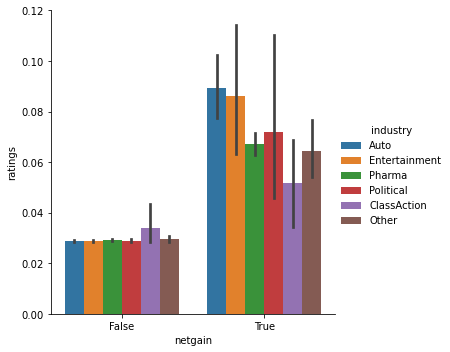

In [23]:
sns.catplot(data=df_train,x='netgain',y='ratings',hue='industry',kind='bar')

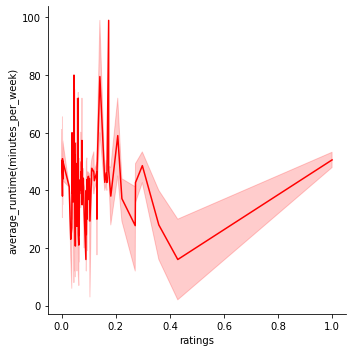

In [24]:
sns.relplot(data=df_train,x='ratings',y='average_runtime(minutes_per_week)',kind='line',color='red')

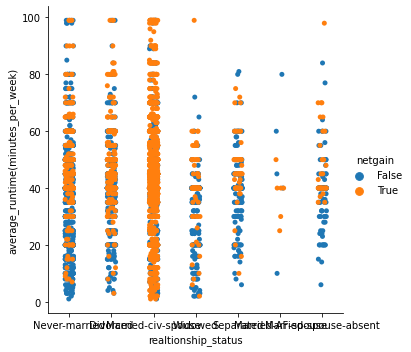

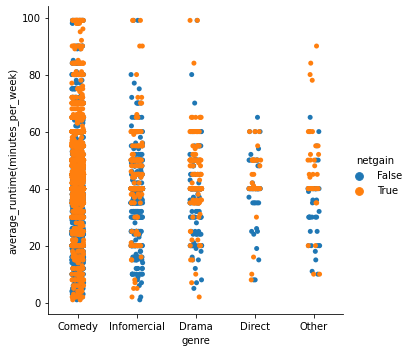

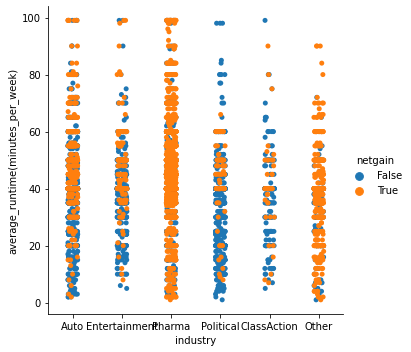

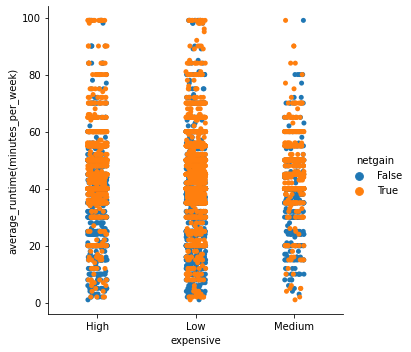

In [25]:
C=['realtionship_status','genre','industry','expensive']
for i in C:
    sns.catplot(data=df_train,x=i,y='average_runtime(minutes_per_week)',hue='netgain')

([<matplotlib.patches.Wedge at 0x7f16ba743350>,
 [Text(0.756484282143058, 0.9315210845013131, 'Male'),
  Text(-0.756484282143058, -0.9315210845013131, 'Female')],
 [Text(0.4412824979167838, 0.5433872992924326, '28.3%'),
  Text(-0.4412824979167838, -0.5433872992924326, '71.7%')])

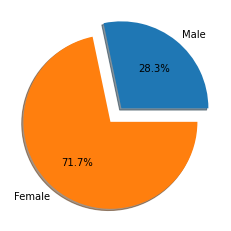

In [26]:
r=pd.get_dummies(df_train['targeted_sex'])
r1=(sum(r["Female"]),sum(r["Male"]))
plt.pie(r1,labels=["Male","Female"],shadow=True,explode=(.1,.1),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f16ba6d5350>,
 [Text(0.755302692150519, 0.9324794063303373, 'High'),
  Text(-1.0408998875134452, -0.5970991744882062, 'low'),
  Text(1.1191476729445176, -0.4330225007350904, 'Medium')],
 [Text(0.44059323708780274, 0.5439463203593634, '28.3%'),
  Text(-0.6071916010495098, -0.34830785178478685, '59.9%'),
  Text(0.6528361425509684, -0.2525964587621361, '11.8%')])

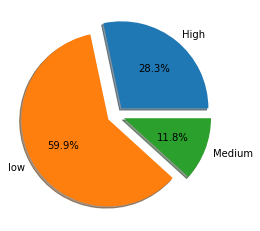

In [27]:
r=pd.get_dummies(df_train['expensive'])
r1=(sum(r["High"]),sum(r["Low"]),sum(r["Medium"]))
plt.pie(r1,labels=["High","low","Medium"],shadow=True,explode=(.1,.1,.1),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f16bad6aa10>,
 [Text(-0.6534392667766767, 1.0064875183698798, 'Primetime'),
  Text(0.41765902025030255, -1.1249715297746683, 'Morning'),
  Text(1.1709871788012745, -0.26227662321112855, 'Daytime')],
 [Text(-0.3811729056197281, 0.5871177190490966, '68.3%'),
  Text(0.24363442847934313, -0.6562333923685565, '24.7%'),
  Text(0.6830758543007434, -0.15299469687315828, '7.0%')])

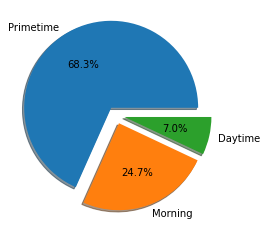

In [28]:
r=pd.get_dummies(df_train['airtime'])
r1=(sum(r["Primetime"]),sum(r["Morning"]),sum(r["Daytime"]))
plt.pie(r1,labels=["Primetime","Morning","Daytime"],shadow=True,explode=(.1,.1,.1),autopct='%1.1f%%')

netgain        False  True    All
industry                         
Auto            1902   684   2586
ClassAction      240    41    281
Entertainment    813   187   1000
Other            231   597    828
Pharma          1782  4599   6381
Political       1227    87   1314
All             6195  6195  12390


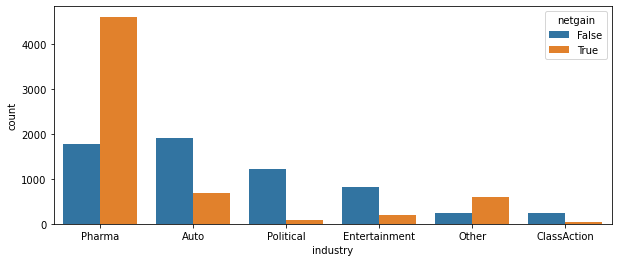

In [29]:
cr=pd.crosstab(df_train['industry'],df_train['netgain'],margins=True,)
print(cr)
plt.figure(figsize=(10,4))
sns.countplot(x='industry',hue='netgain',data=df_train,order=df_train['industry'].value_counts().index);

netgain      False  True    All
genre                          
Comedy        5197  5603  10800
Direct          65    40    105
Drama          189   206    395
Infomercial    692   309   1001
Other           52    37     89
All           6195  6195  12390


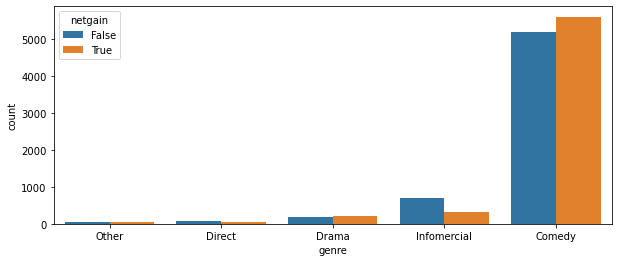

In [30]:
cr1=pd.crosstab(df_train['genre'],df_train['netgain'],margins=True,)
print(cr1)
plt.figure(figsize=(10,4))
sns.countplot(x='genre',hue='netgain',data=df_train,order=df_train['genre'].value_counts().sort_values().index);

netgain                False  True    All
realtionship_status                      
Divorced                1009   394   1403
Married-AF-spouse          5     6     11
Married-civ-spouse      2063  5213   7276
Married-spouse-absent    110    33    143
Never-married           2515   415   2930
Separated                262    60    322
Widowed                  231    74    305
All                     6195  6195  12390


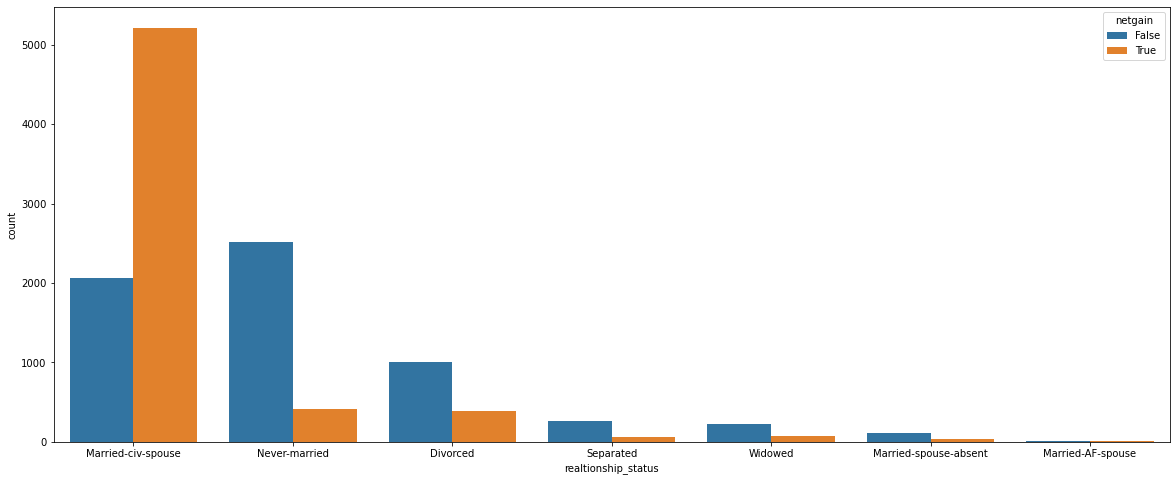

In [31]:
cr2=pd.crosstab(df_train['realtionship_status'],df_train['netgain'],margins=True,)
print(cr2)
plt.figure(figsize=(20,8))
sns.countplot(x='realtionship_status',hue='netgain',data=df_train,order=df_train['realtionship_status'].value_counts().index);

netgain    False  True    All
expensive                    
High        1730  1780   3510
Low         3722  3702   7424
Medium       743   713   1456
All         6195  6195  12390


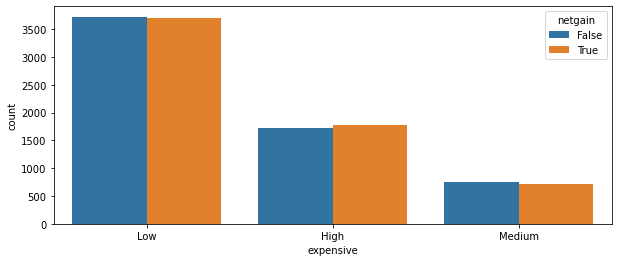

In [32]:
cr3=pd.crosstab(df_train['expensive'],df_train['netgain'],margins=True,)
print(cr3)
plt.figure(figsize=(10,4))
sns.countplot(x='expensive',hue='netgain',data=df_train,order=df_train['expensive'].value_counts().index);

netgain       False  True    All
targeted_sex                    
Female         2476  1029   3505
Male           3719  5166   8885
All            6195  6195  12390


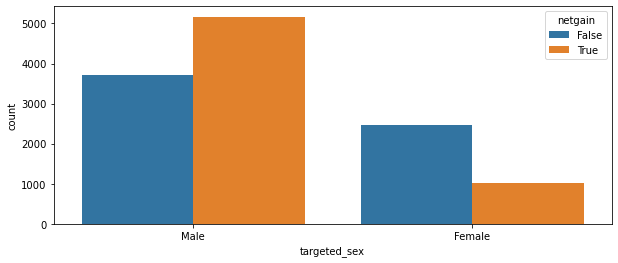

In [33]:
cr=pd.crosstab(df_train['targeted_sex'],df_train['netgain'],margins=True,)
print(cr)
plt.figure(figsize=(10,4))
sns.countplot(x='targeted_sex',hue='netgain',data=df_train,order=df_train['targeted_sex'].value_counts().index);

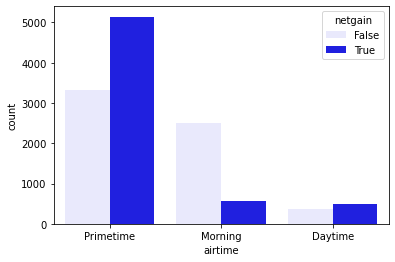

In [34]:
sns.countplot(df_train.airtime,hue=df_train.netgain,color='blue')

Text(0, 0.5, 'Probability Density')

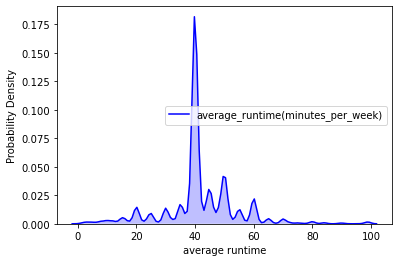

In [35]:
sns.kdeplot(df_train["average_runtime(minutes_per_week)"],color='b',shade=True)
plt.xlabel('average runtime') 
plt.ylabel('Probability Density') 

In [36]:
rel=pd.crosstab(train["industry"],train["genre"])
rel

genre,Comedy,Direct,Drama,Infomercial,Other
industry,,,,,
Auto,5814,65,191,675,56
ClassAction,578,10,69,125,14
Entertainment,2032,35,75,591,32
Other,1108,14,60,129,22
Pharma,9381,82,285,537,54
Political,3345,41,123,459,46


In [37]:
rel=pd.crosstab(train["realtionship_status"],train["genre"])
rel

genre,Comedy,Direct,Drama,Infomercial,Other
realtionship_status,,,,,
Divorced,3126,40,86,379,18
Married-AF-spouse,17,0,0,2,0
Married-civ-spouse,10622,99,364,678,81
Married-spouse-absent,285,8,18,55,12
Never-married,6982,89,293,1094,89
Separated,549,5,20,200,19
Widowed,677,6,22,108,5


In [38]:
rel=pd.crosstab(train["industry"],train["expensive"])
rel

expensive,High,Low,Medium
industry,,,
Auto,1871,4128,802
ClassAction,231,480,85
Entertainment,831,1636,298
Other,383,791,159
Pharma,2838,6251,1250
Political,1125,2407,482


In [39]:
train.head(5)

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [40]:
def Interchange(data,variable):
    a=preprocessing.LabelEncoder()
    a.fit(data[variable])
    list(a.classes_)
    data[variable]=a.transform(data[variable])
    return(data[variable])

In [41]:
variable=['realtionship_status', 'industry', 'genre', 'targeted_sex','airtime', 'expensive', 'money_back_guarantee','airlocation','netgain']
for i in variable:
    Interchange(df_train,[i])
df_train.dtypes

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


id                                     int64
realtionship_status                    int64
industry                               int64
genre                                  int64
targeted_sex                           int64
average_runtime(minutes_per_week)      int64
airtime                                int64
airlocation                            int64
ratings                              float64
expensive                              int64
money_back_guarantee                   int64
netgain                                int64
dtype: object

In [42]:
df_train.head(5)

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
23913,22294,4,0,0,1,22,2,38,0.027465,0,1,0
8178,16845,0,2,3,0,40,2,38,0.027465,1,0,0
2198,19863,2,4,0,1,40,1,38,0.027465,1,0,0
15094,16767,6,2,0,0,40,2,38,0.027465,0,0,0
8425,2347,4,5,0,0,40,2,38,0.027465,1,1,0


In [43]:
x=df_train[['realtionship_status', 'industry', 'genre', 'targeted_sex','ratings','average_runtime(minutes_per_week)','expensive', 'money_back_guarantee','airlocation','airtime']]
y=df_train[['netgain']]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score



In [46]:
logreg=LogisticRegression()
#lr=LinearRegression()

In [47]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('RFC',RandomForestClassifier()))

In [48]:
logreg.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [49]:
c=[10,100]
solver=['liblinear','newton-cg','saga']
score=[]
for i in range(len(c)):
    for j in range(len(solver)):
        logreg=LogisticRegression(C=c[i],solver=solver[j])
        logreg.fit(x_train,y_train)
        y_test_pred=logreg.predict(x_test)
        score.append(accuracy_score(y_test,y_test_pred))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/

In [50]:
score

[0.741727199354318,
 0.741727199354318,
 0.7000269034167339,
 0.743879472693032,
 0.743879472693032,
 0.7000269034167339]

In [51]:
from sklearn.metrics import classification_report
logreg=LogisticRegression(C=100,solver='newton-cg')
logreg.fit(x_train,y_train)
y_test_pred=logreg.predict(x_test)
print(classification_report(y_test,y_test_pred))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1885
           1       0.73      0.77      0.75      1832

    accuracy                           0.74      3717
   macro avg       0.74      0.74      0.74      3717
weighted avg       0.74      0.74      0.74      3717



In [52]:
predicted=logreg.predict(x_train)
Acc_score_tr=accuracy_score(y_train,predicted)
print('Accuracy score:',Acc_score_tr)

Accuracy score: 0.7372304854145048


In [53]:
estimators=[10,50,100]
rfcscore=[]
for i in range(len(estimators)):
    rfc=RandomForestClassifier(n_estimators=estimators[i])
    rfc.fit(x_train,y_train)
    y_pred1=rfc.predict(x_test)
    rfcscore.append(accuracy_score(y_test,y_pred1))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [54]:
rfcscore

[0.7576002152273339, 0.7662093085821899, 0.7699757869249395]

In [55]:
Con_matrix_tr=confusion_matrix(y_train,predicted)
print('Confusin metrix:',Con_matrix_tr)

Confusin metrix: [[3053 1257]
 [1022 3341]]


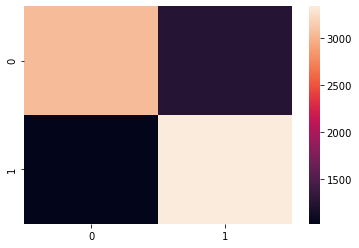

In [56]:
sns.heatmap(confusion_matrix(y_train,predicted))

In [57]:
#fpr,tpr,thresholds=metrics.roc_auc_score(y_train,predicted)

In [58]:
from sklearn.metrics import average_precision_score
average_precision_tr = average_precision_score(y_train, predicted)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_tr))

Average precision-recall score: 0.67


In [59]:
from sklearn.metrics import recall_score
Re_score_tr=recall_score(y_train, predicted)
print('recall_score on train set :',Re_score_tr)

recall_score on train set : 0.7657575063030025


In [60]:
from sklearn.metrics import f1_score
F1_score_tr=f1_score(y_train, predicted)
print('F1_sccore on train set :',F1_score_tr)

F1_sccore on train set : 0.7456757058364023


In [61]:
prediction = logreg.predict(x_test)
accuracy_score_ts= accuracy_score(y_test,prediction)
print('accuracy score on test  :',accuracy_score_ts)

accuracy score on test  : 0.743879472693032


In [62]:
Con_matrix_ts=confusion_matrix(y_test,prediction)
print('Confusin metrix:',Con_matrix_ts)

Confusin metrix: [[1360  525]
 [ 427 1405]]


In [63]:
from sklearn.metrics import average_precision_score
average_precision_ts = average_precision_score(y_test, prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_ts))

Average precision-recall score: 0.67


In [64]:
Re_score_ts=recall_score(y_test, prediction)
print('recall_score on train set :',Re_score_ts)

recall_score on train set : 0.7669213973799127


In [65]:
F1_score_ts=f1_score(y_test, prediction)
print('F1_sccore on train set :',F1_score_ts)

F1_sccore on train set : 0.7469431153641679


In [66]:
data=pd.DataFrame({'Accuracy_score':[Acc_score_tr,accuracy_score_ts],'Confusion_matrix':[Con_matrix_tr,Con_matrix_ts],
                  'Average_precision_score':[average_precision_tr,average_precision_ts],'recall_score':[Re_score_tr,Re_score_ts]
                  ,'f1_score':[F1_score_tr,F1_score_ts]},
                 index=['Train','Test'])

In [67]:
np.transpose(data)

,Train,Test
Accuracy_score,0.73723,0.743879
Confusion_matrix,"[[3053, 1257], [1022, 3341]]","[[1360, 525], [427, 1405]]"
Average_precision_score,0.674252,0.67318
recall_score,0.765758,0.766921
f1_score,0.745676,0.746943


In [68]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [69]:
cross_val_score(logreg,x,y,cv=3)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.73801453, 0.74140436, 0.7377724 ])

In [70]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [72]:
#model on train using all the independent values in df
rfc_prediction = rfc2.predict(x_train)
rfc_score= accuracy_score(y_train,rfc_prediction)
print('accuracy Score on train using RandomForest :',rfc_score)

accuracy Score on train using RandomForest : 0.8694799953879857


In [73]:
confusion_matrix(y_train, rfc_prediction)

array([[3467,  843],
       [ 289, 4074]])

In [74]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,rfc_prediction)
print("AUC on train using RandomForest :",metrics.auc(fpr, tpr))

AUC on train using RandomForest : 0.8690847630863414


In [75]:
average_precision = average_precision_score(y_train, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.81


In [76]:
print('recall_score on train set :',recall_score(y_train, rfc_prediction))

recall_score on train set : 0.9337611735044694


In [77]:
print('F1_sccore on train set :',f1_score(y_train, rfc_prediction))

F1_sccore on train set : 0.8780172413793105


In [78]:
rfc_prediction = rfc2.predict(x_test)
rfc_score= accuracy_score(y_test,rfc_prediction)
print('accuracy score on test using RandomForest ',rfc_score)

accuracy score on test using RandomForest  0.7675544794188862
